In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import math
import seaborn as sns

from sklearn.model_selection import train_test_split

After reserch on the dataset, I have analyzed and found out the min and max ranges of values and its effects on diabetes .There are 8 independent variables:

Pregnancies: No. of times pregnant

Glucose: Plasma Glucose Concentration a 2 hour in an oral glucose tolerance test (mg/dl) A 2-hour value between 140 and 199 mg/dL (7.8 and 11.1 mmol/L) is called impaired glucose tolerance. This is called "pre- diabetes." It means you are at increased risk of developing diabetes over time. A glucose level of 200 mg/dL (11.1 mmol/L) or higher is used to diagnose diabetes.

Blood Pressure: we only have diastolic blood pressure Diastolic Blood Pressure(mmHg): If Diastolic B.P > 90 means High B.P (High Probability of Diabetes) Diastolic B.P < 80 means low B.P (Less Probability of Diabetes)

Skin Thickness: Triceps Skin Fold Thickness (mm) – A value used to estimate body fat. Normal Triceps SkinFold Thickness in women is 18- 23mm. Higher thickness leads to obesity and chances of diabetes increases.

Insulin: 2-Hour Serum Insulin (mu U/ml) Normal Insulin Level 16-166 mIU/L Values above this range can be alarming.

BMI: Body Mass Index (weight in kg/ height in m2) .BMI below 18.5 refers to underweight. Body Mass Index of 18.5 to 25 is within the normal range BMI between 25 and 30 then it falls within the overweight range. A BMI of 30 or over falls within the obese range.

Diabetes Pedigree Function: It provides information about diabetes history in relatives and genetic relationship of those relatives with patients. Higher Pedigree Function means patient is more likely to have diabetes.

Age (years)

Outcome: Class Variable (0 or 1) where ‘0’ denotes patient is not having diabetes and ‘1’ denotes patient having diabetes The dependent variable is whether the patient is having diabetes or not.



A fasting blood sugar level less than 100 mg/dL (5.6 mmol/L) is normal. A fasting blood sugar level from 100 to 125 mg/dL (5.6 to 6.9 mmol/L) is considered prediabetes. If it's 126 mg/dL (7 mmol/L) or higher on two separate tests, you have diabetes

Using Libraries

Loading dataset

In [5]:
address= 'C:/Users/Admin/Desktop/DFKI/diabetes.csv'
dataset= pd.read_csv(address)

In [6]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
import itertools
plt.style.use('fivethirtyeight')

Analysis of Diabetic Cases

<ipython-input-10-314ef3cfc025>:6: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot((length/2),3,j+1)


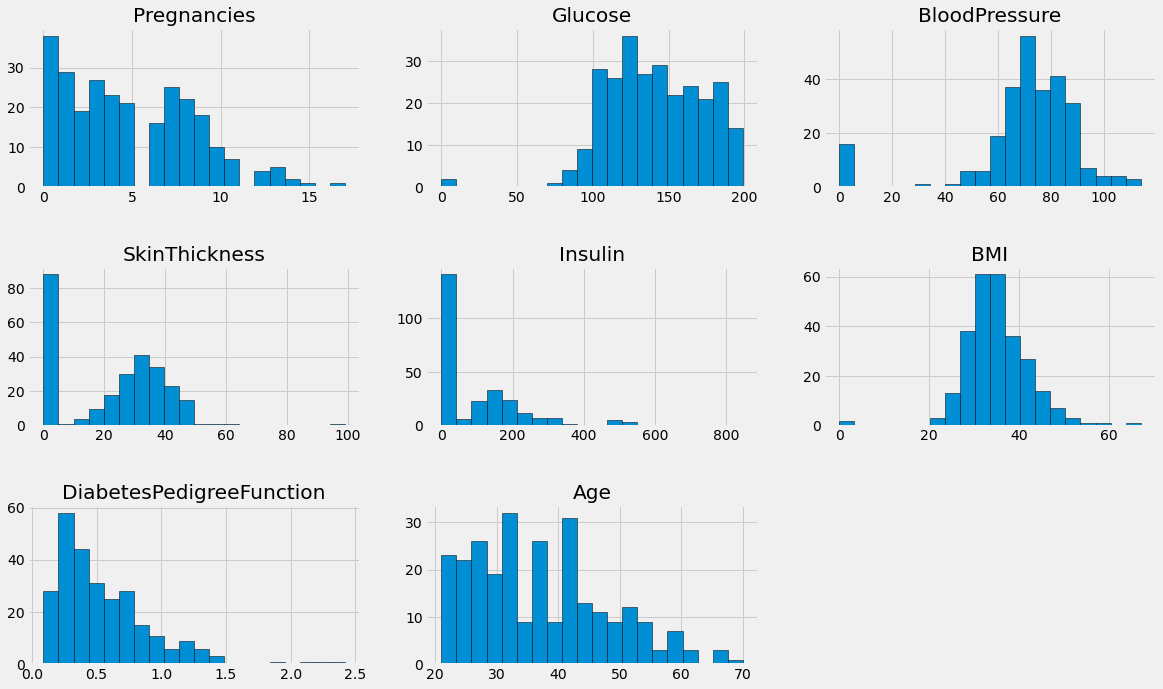

In [10]:
diab1=dataset[dataset['Outcome']==1]
columns=dataset.columns[:8]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    diab1[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

In [12]:
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

Split the dataset

In [13]:
outcome=dataset['Outcome']
data=dataset[dataset.columns[:8]]
train,test=train_test_split(dataset,test_size=0.25,random_state=0,stratify=dataset['Outcome'])# stratify the outcome
train_X=train[train.columns[:8]]
test_X=test[test.columns[:8]]
train_Y=train['Outcome']
test_Y=test['Outcome']

In [14]:
train_X.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
432,1,80,74,11,60,30.0,0.527,22
453,2,119,0,0,0,19.6,0.832,72


Applying Different models

In [15]:
types=['rbf','linear']
for i in types:
    model=svm.SVC(kernel=i)
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    print('Accuracy for SVM kernel=',i,'is',metrics.accuracy_score(prediction,test_Y))

Accuracy for SVM kernel= rbf is 0.765625
Accuracy for SVM kernel= linear is 0.7708333333333334


In [16]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_Y))

The accuracy of the Logistic Regression is 0.78125


In [17]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,test_Y))

The accuracy of the Decision Tree is 0.75


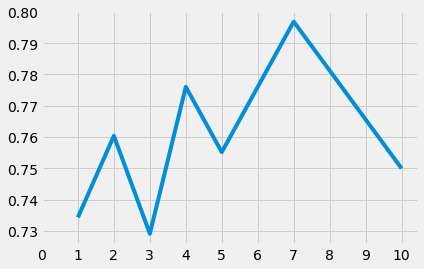

Accuracies for different values of n are: [0.734375   0.76041667 0.72916667 0.77604167 0.75520833 0.77604167
 0.796875   0.78125    0.765625   0.75      ]


In [18]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
plt.show()
print('Accuracies for different values of n are:',a.values)

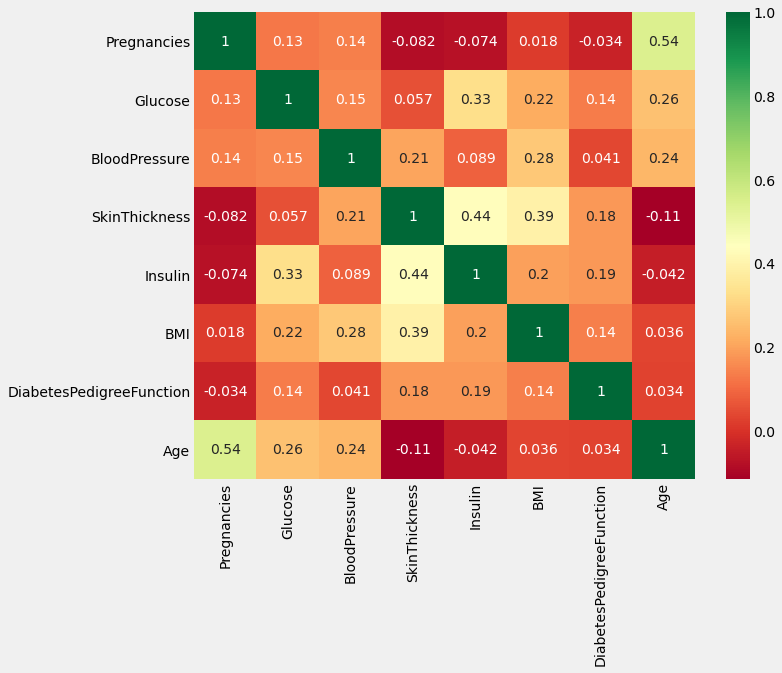

In [19]:
sns.heatmap(dataset[dataset.columns[:8]].corr(),annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [20]:
from sklearn.ensemble import RandomForestClassifier 
model= RandomForestClassifier(n_estimators=100,random_state=0)
X=dataset[dataset.columns[:8]]
Y=dataset['Outcome']
model.fit(X,Y)
pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)

Glucose                     0.242098
BMI                         0.172574
Age                         0.135220
DiabetesPedigreeFunction    0.128324
BloodPressure               0.092903
Pregnancies                 0.086774
SkinThickness               0.073109
Insulin                     0.068999
dtype: float64

In [21]:
a=dataset.describe(include='all')
a

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [24]:
abc=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier()]
for i in models:
    model = i
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    abc.append(metrics.accuracy_score(prediction,test_Y))
models_dataframe=pd.DataFrame(abc,index=classifiers)   
models_dataframe.columns=['Accuracy']
models_dataframe

,Accuracy
Linear Svm,0.770833
Radial Svm,0.765625
Logistic Regression,0.781250
KNN,0.729167
Decision Tree,0.770833


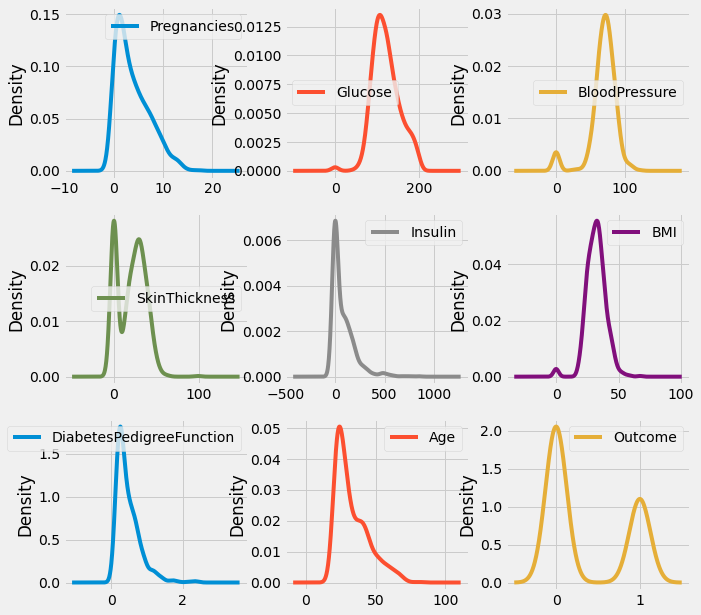

In [34]:
dataset.plot(kind='density', subplots=True, layout=(3,3), sharex=False , figsize =(10,10))
plt.show()

We saw that some variables contains 0, it doesnot make sense and indicates themissing values and we replace 0 by the NaN

In [35]:
dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [41]:
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.tools as tls
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)


In [43]:
def missing_plot(dataset, key) :
    null_feat = pd.DataFrame(len(dataset[key]) - dataset.isnull().sum(), columns = ['Count'])
    percentage_null = pd.DataFrame((len(dataset[key]) - (len(dataset[key]) - dataset.isnull().sum()))/len(dataset[key])*100, columns = ['Count'])
    percentage_null = percentage_null.round(2)

    trace = go.Bar(x = null_feat.index, y = null_feat['Count'] ,opacity = 0.8, text = percentage_null['Count'],  textposition = 'auto',marker=dict(color = '#7EC0EE',
            line=dict(color='#000000',width=1.5)))

    layout = dict(title =  "Missing Values (count & %)")

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)

In [45]:
missing_plot(dataset, 'Outcome')

Replacing missing values

In [46]:
def correlation_plot():
    #correlation
    correlation = data.corr()
    #tick labels
    matrix_cols = correlation.columns.tolist()
    #convert to array
    corr_array  = np.array(correlation)
    trace = go.Heatmap(z = corr_array,
                       x = matrix_cols,
                       y = matrix_cols,
                       colorscale='Viridis',
                       colorbar   = dict() ,
                      )
    layout = go.Layout(dict(title = 'Correlation Matrix for variables',
                            #autosize = False,
                            #height  = 1400,
                            #width   = 1600,
                            margin  = dict(r = 0 ,l = 100,
                                           t = 0,b = 100,
                                         ),
                            yaxis   = dict(tickfont = dict(size = 9)),
                            xaxis   = dict(tickfont = dict(size = 9)),
                           )
                      )
    fig = go.Figure(data = [trace],layout = layout)
    py.iplot(fig)

In [47]:
correlation_plot()

Replacing missing values

In [48]:
def median_target(var):   
    temp = data[data[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [52]:
D = dataset[(dataset['Outcome'] != 0)]
H = dataset[(dataset['Outcome'] == 0)]

In [73]:
def plot_distribution(data_select, size_bin) :  
    # 2 datasets
    tmp1 = D[data_select]
    tmp2 = H[data_select]
    hist_data = [tmp1, tmp2]
    
    group_labels = ['diabetic', 'healthy']
    colors = ['#FFD700', '#7EC0EE']

    fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, bin_size = size_bin, curve_type='kde')
    
    fig['layout'].update(title = data_select)

    py.iplot(fig, filename = 'Density plot')

In [56]:
def median_target(var):   
    temp = dataset[dataset[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [57]:
median_target('Insulin')

,Outcome,Insulin
0,0,102.5
1,1,169.5


Insulin's medians by the target are really different  102.5 for a healthy person and 169.5 for a diabetic person

In [58]:
dataset.loc[(dataset['Outcome'] == 0 ) & (dataset['Insulin'].isnull()), 'Insulin'] = 102.5
dataset.loc[(dataset['Outcome'] == 1 ) & (dataset['Insulin'].isnull()), 'Insulin'] = 169.5

In [60]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,NaN,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,102.5,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,169.5,30.1,0.349,47,1


In [61]:
median_target('Glucose')

,Outcome,Glucose
0,0,107.0
1,1,140.0


In [65]:
dataset.loc[(dataset['Outcome'] == 0 ) & (dataset['Glucose'].isnull()), 'Glucose'] = 107
dataset.loc[(dataset['Outcome'] == 1 ) & (dataset['Glucose'].isnull()), 'Glucose'] = 140

In [66]:
median_target('SkinThickness')

,Outcome,SkinThickness
0,0,27.0
1,1,32.0


In [67]:
dataset.loc[(dataset['Outcome'] == 0 ) & (dataset['SkinThickness'].isnull()), 'SkinThickness'] = 27
dataset.loc[(dataset['Outcome'] == 1 ) & (dataset['SkinThickness'].isnull()), 'SkinThickness'] = 32

In [68]:
median_target('BloodPressure')

,Outcome,BloodPressure
0,0,70.0
1,1,74.5


In [69]:
dataset.loc[(dataset['Outcome'] == 0 ) & (dataset['BloodPressure'].isnull()), 'BloodPressure'] = 70
dataset.loc[(dataset['Outcome'] == 1 ) & (dataset['BloodPressure'].isnull()), 'BloodPressure'] = 74.5

In [70]:
median_target('BMI')

,Outcome,BMI
0,0,30.1
1,1,34.3


In [71]:
dataset.loc[(dataset['Outcome'] == 0 ) & (dataset['BMI'].isnull()), 'BMI'] = 30.1
dataset.loc[(dataset['Outcome'] == 1 ) & (dataset['BMI'].isnull()), 'BMI'] = 34.3

In [72]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,102.5,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,32.0,169.5,30.1,0.349,47,1


In [74]:

plot_distribution('Age', 0)
plot_distribution('Pregnancies', 0)
plot_distribution('DiabetesPedigreeFunction', 0)

In [76]:
missing_plot(dataset, 'Outcome')

In [80]:
def plot_feat1_feat2(feat1, feat2) :  
    D = data[(dataset['Outcome'] != 0)]
    H = data[(dataset['Outcome'] == 0)]
    trace0 = go.Scatter(
        x = D[feat1],
        y = D[feat2],
        name = 'diabetic',
        mode = 'markers', 
        marker = dict(color = '#FFD700',
            line = dict(
                width = 1)))

    trace1 = go.Scatter(
        x = H[feat1],
        y = H[feat2],
        name = 'healthy',
        mode = 'markers',
        marker = dict(color = '#7EC0EE',
            line = dict(
                width = 1)))

    layout = dict(title = feat1 +" "+"vs"+" "+ feat2,
                  yaxis = dict(title = feat2,zeroline = False),
                  xaxis = dict(title = feat1, zeroline = False)
                 )

    plots = [trace0, trace1]

    fig = dict(data = plots, layout=layout)
    py.iplot(fig)


In [81]:
plot_feat1_feat2('Glucose','Age')

In [386]:
def barplot(var_select, sub) :
    tmp1 = dataset[(dataset['Outcome'] != 0)]
    tmp2 = dataset[(dataset['Outcome'] == 0)]
    tmp3 = pd.DataFrame(pd.crosstab(dataset[var_select],dataset['Outcome']), )
    tmp3['% diabetic'] = tmp3[1] / (tmp3[1] + tmp3[0]) * 100

    color=['lightskyblue','gold' ]
    trace1 = go.Bar(
        x=tmp1[var_select].value_counts().keys().tolist(),
        y=tmp1[var_select].value_counts().values.tolist(),
        text=tmp1[var_select].value_counts().values.tolist(),
        textposition = 'auto',
        name='diabetic',opacity = 0.8, marker=dict(
        color='gold',
        line=dict(color='#000000',width=1)))

    
    trace2 = go.Bar(
        x=tmp2[var_select].value_counts().keys().tolist(),
        y=tmp2[var_select].value_counts().values.tolist(),
        text=tmp2[var_select].value_counts().values.tolist(),
        textposition = 'auto',
        name='healthy', opacity = 0.8, marker=dict(
        color='lightskyblue',
        line=dict(color='#000000',width=1)))
    
    trace3 =  go.Scatter(   
        x=tmp3.index,
        y=tmp3['% diabetic'],
        yaxis = 'y2',
        name='% diabetic', opacity = 0.6, marker=dict(
        color='black',
        line=dict(color='#000000',width=0.5
        )))

    layout = dict(title =  str(var_select)+' '+(sub),
              xaxis=dict(), 
              yaxis=dict(title= 'Count'), 
              yaxis2=dict(range= [-0, 75], 
                          overlaying= 'y', 
                          anchor= 'x', 
                          side= 'right',
                          zeroline=False,
                          showgrid= False, 
                          title= '% diabetic'
                         ))

    fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
    py.iplot(fig)



In [157]:
plot_feat1_feat2('Glucose','Age')

In [95]:
dataset.loc[:,'N1']=0
dataset.loc[(dataset['Age']<=30) & (dataset['Glucose']<=120),'N1']=1

Healthy persons are concentrate with an age <= 30 and glucose <= 120

In [387]:
barplot('N1', ':Glucose <= 120 and Age <= 30')

In [391]:
plot_pie('N1', '(Glucose <= 120 and Age <= 30)')

(242, 26)
(256, 244)


In [411]:
TP =242                          #confusion_matrix[1, 1]
TN = 256                         #confusion_matrix[0, 0]
FP = 244                           #confusion_matrix[0, 1]
FN = 26                           #confusion_matrix[1, 0]
# DT
print("Sensitivity: %.4f" % (TP / float(TP + FN)))
print("Specificity  : %.4f" % (TN / float(TN + FP)))
print("Accuracy  : %.4f" % ((TN+TP) / float(TN + FP+TP+FN)))
pre= (TP / float(TP + FP))
print("Precision: %.4f" %(TP / float(TP + FP)))
print("Recall: %.4f" % (TP / float(TP + FN)))
rec=(TP / float(TP + FN))
print("F1 Score: %.4f" % (2*(pre*rec) / float(pre+rec)))

Sensitivity: 0.9030
Specificity  : 0.5120
Accuracy  : 0.6484
Precision: 0.4979
Recall: 0.9030
F1 Score: 0.6419


According to wikipedia "The body mass index (BMI) is a value derived from the mass (weight) and height of an individual. The BMI is defined as the body mass divided by the square of the body height, and is universally expressed in units of kg/m2, resulting from mass in kilograms and height in metres."

30 kg/m² is the limit

In [97]:
dataset.loc[:,'N2']=0
dataset.loc[(dataset['BMI']<=30),'N2']=1

In [98]:
barplot('N2', ': BMI <= 30')

In [392]:
plot_pie('N2', 'BMI <= 30')

(217, 51)
(259, 241)


In [410]:
TP =217                         #confusion_matrix[1, 1]
TN = 259                         #confusion_matrix[0, 0]
FP = 241                           #confusion_matrix[0, 1]
FN = 51                           #confusion_matrix[1, 0]
# DT
print("Sensitivity: %.4f" % (TP / float(TP + FN)))
print("Specificity  : %.4f" % (TN / float(TN + FP)))
print("Accuracy  : %.4f" % ((TN+TP) / float(TN + FP+TP+FN)))
pre= (TP / float(TP + FP))
print("Precision: %.4f" %(TP / float(TP + FP)))
print("Recall: %.4f" % (TP / float(TP + FN)))
rec=(TP / float(TP + FN))
print("F1 Score: %.4f" % (2*(pre*rec) / float(pre+rec)))

Sensitivity: 0.8097
Specificity  : 0.5180
Accuracy  : 0.6198
Precision: 0.4738
Recall: 0.8097
F1 Score: 0.5978


In [99]:
plot_feat1_feat2('Pregnancies','Age')

In [421]:
dataset.loc[:,'N3']=0
dataset.loc[(dataset['Age']<=30) & (dataset['Pregnancies']<=6),'N3']=1

In [101]:
barplot('N3', ': Age <= 30 and Pregnancies <= 6')

In [393]:
plot_pie('N3', 'Age <= 30 and Pregnancies <= 6')

(182, 86)
(325, 175)


In [409]:
TP =182                          #confusion_matrix[1, 1]
TN = 325                         #confusion_matrix[0, 0]
FP = 175                           #confusion_matrix[0, 1]
FN = 86                           #confusion_matrix[1, 0]
# DT
print("Sensitivity: %.4f" % (TP / float(TP + FN)))
print("Specificity  : %.4f" % (TN / float(TN + FP)))
print("Accuracy  : %.4f" % ((TN+TP) / float(TN + FP+TP+FN)))
pre= (TP / float(TP + FP))
print("Precision: %.4f" %(TP / float(TP + FP)))
print("Recall: %.4f" % (TP / float(TP + FN)))
rec=(TP / float(TP + FN))
print("F1 Score: %.4f" % (2*(pre*rec) / float(pre+rec)))

Sensitivity: 0.6791
Specificity  : 0.6500
Accuracy  : 0.6602
Precision: 0.5098
Recall: 0.6791
F1 Score: 0.5824


In [102]:
plot_feat1_feat2('Glucose','BloodPressure')

Healthy persons are concentrate with an blood pressure <= 80 and glucose <= 105

In [423]:
dataset.loc[:,'N4']=0
dataset.loc[(dataset['Glucose']<=105) & (dataset['BloodPressure']<=80),'N4']=1

In [424]:
barplot('N4', ': Glucose <= 105 and BloodPressure <= 80')

In [394]:
plot_pie('N4', 'Glucose <= 105 and BloodPressure <= 80')

(247, 21)
(294, 206)


In [408]:
TP =247                          #confusion_matrix[1, 1]
TN = 294                         #confusion_matrix[0, 0]
FP = 206                           #confusion_matrix[0, 1]
FN = 21                           #confusion_matrix[1, 0]
# DT
print("Sensitivity: %.4f" % (TP / float(TP + FN)))
print("Specificity  : %.4f" % (TN / float(TN + FP)))
print("Accuracy  : %.4f" % ((TN+TP) / float(TN + FP+TP+FN)))
pre= (TP / float(TP + FP))
print("Precision: %.4f" %(TP / float(TP + FP)))
print("Recall: %.4f" % (TP / float(TP + FN)))
rec=(TP / float(TP + FN))
print("F1 Score: %.4f" % (2*(pre*rec) / float(pre+rec)))

Sensitivity: 0.9216
Specificity  : 0.5880
Accuracy  : 0.7044
Precision: 0.5453
Recall: 0.9216
F1 Score: 0.6852


In [105]:
dataset.loc[:,'N5']=0
dataset.loc[(dataset['SkinThickness']<=20) ,'N5']=1

In [106]:
barplot('N5', ':SkinThickness <= 20')

In [107]:
plot_feat1_feat2('SkinThickness','BMI')

In [109]:
dataset.loc[:,'N6']=0
dataset.loc[(dataset['BMI']<30) & (dataset['SkinThickness']<=20),'N6']=1

Healthy persons are concentrate with a BMI < 30 and skin thickness <= 20

In [110]:
barplot('N6', ': BMI < 30 and SkinThickness <= 20')

In [111]:
plot_feat1_feat2('Glucose','BMI')

In [112]:
dataset.loc[:,'N7']=0
dataset.loc[(dataset['Glucose']<=105) & (dataset['BMI']<=30),'N7']=1

In [113]:
barplot('N7', ': Glucose <= 105 and BMI <= 30')

In [383]:
plot_pie('N7', 'Glucose <= 105 and BMI <= 30')

(262, 6)
(384, 116)


In [413]:
TP =262                          #confusion_matrix[1, 1]
TN = 384                         #confusion_matrix[0, 0]
FP = 116                           #confusion_matrix[0, 1]
FN = 6                           #confusion_matrix[1, 0]
# DT
print("Sensitivity: %.4f" % (TP / float(TP + FN)))
print("Specificity  : %.4f" % (TN / float(TN + FP)))
print("Accuracy  : %.4f" % ((TN+TP) / float(TN + FP+TP+FN)))
pre= (TP / float(TP + FP))
print("Precision: %.4f" %(TP / float(TP + FP)))
print("Recall: %.4f" % (TP / float(TP + FN)))
rec=(TP / float(TP + FN))
print("F1 Score: %.4f" % (2*(pre*rec) / float(pre+rec)))
print("F1 Score: %.4f" %(2*(((TP/(TP+FP))*(TP/(TP+FN)))/((TP/(TP+FP))+(TP/(TP+FN))))))

Sensitivity: 0.9776
Specificity  : 0.7680
Accuracy  : 0.8411
Precision: 0.6931
Recall: 0.9776
F1 Score: 0.8111
F1 Score: 0.8111


In [115]:
dataset.loc[:,'N9']=0
dataset.loc[(dataset['Insulin']<200),'N9']=1

In [116]:
barplot('N9', ': Insulin < 200')

In [117]:
dataset.loc[:,'N10']=0
dataset.loc[(dataset['BloodPressure']<80),'N10']=1

In [118]:
barplot('N10', ': BloodPressure < 80')

In [119]:
dataset.loc[:,'N11']=0
dataset.loc[(dataset['Pregnancies']<4) & (dataset['Pregnancies']!=0) ,'N11']=1

In [382]:
def plot_pie(var_select, sub) :
    D = dataset[(dataset['Outcome'] != 0)]
    H = dataset[(dataset['Outcome'] == 0)]
    
    col =['Silver', 'mediumturquoise','#CF5C36','lightblue','magenta', '#FF5D73','#F2D7EE','mediumturquoise']
    
    trace1 = go.Pie(values  = D[var_select].value_counts().values.tolist(),
                    labels  = D[var_select].value_counts().keys().tolist(),
                    textfont=dict(size=15), opacity = 0.8,
                    hole = 0.5, 
                    hoverinfo = "label+percent+name+value",
                    domain  = dict(x = [.0,.48]),
                    name    = "Diabetic",
                    marker  = dict(colors = col, line = dict(width = 1.5)))
    trace2 = go.Pie(values  = H[var_select].value_counts().values.tolist(),
                    labels  = H[var_select].value_counts().keys().tolist(),
                    textfont=dict(size=15), opacity = 0.8,
                    hole = 0.5,
                    hoverinfo = "label+percent+name+value",
                    marker  = dict(line = dict(width = 1.5)),
                    domain  = dict(x = [.52,1]),
                    name    = "Healthy" )

    layout = go.Layout(dict(title = var_select + " distribution by target <br>"+(sub),
                            annotations = [ dict(text = "Diabetic"+" : "+"268",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .22, y = -0.1),
                                            dict(text = "Healthy"+" : "+"500",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .8,y = -.1)]))
                                          

    fig  = go.Figure(data = [trace1,trace2],layout = layout)
    py.iplot(fig)

    print(trace1.values) 
    print(trace2.values)

In [168]:
barplot('N11', ': Pregnancies > 0 and < 4')

In [146]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, confusion_matrix,  roc_curve, precision_recall_curve, accuracy_score, roc_auc_score
import lightgbm as lgbm
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from yellowbrick.classifier import DiscriminationThreshold
from sklearn.preprocessing import LabelEncoder

ModuleNotFoundError: No module named 'yellowbrick'

In [125]:
target_col = ["Outcome"]
cat_cols   = dataset.nunique()[dataset.nunique() < 12].keys().tolist()
cat_cols   = [x for x in cat_cols ]
#numerical columns
num_cols   = [x for x in dataset.columns if x not in cat_cols + target_col]
#Binary columns with 2 values
bin_cols   = dataset.nunique()[dataset.nunique() == 2].keys().tolist()
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    dataset[i] = le.fit_transform(dataset[i])
    
#Duplicating columns for multi value columns
dataset = pd.get_dummies(data = dataset,columns = multi_cols )

#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(dataset[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

#dropping original values merging scaled values for numerical columns
df_data_og = data.copy()
dataset = dataset.drop(columns = num_cols,axis = 1)
dataset = dataset.merge(scaled,left_index=True,right_index=True,how = "left")

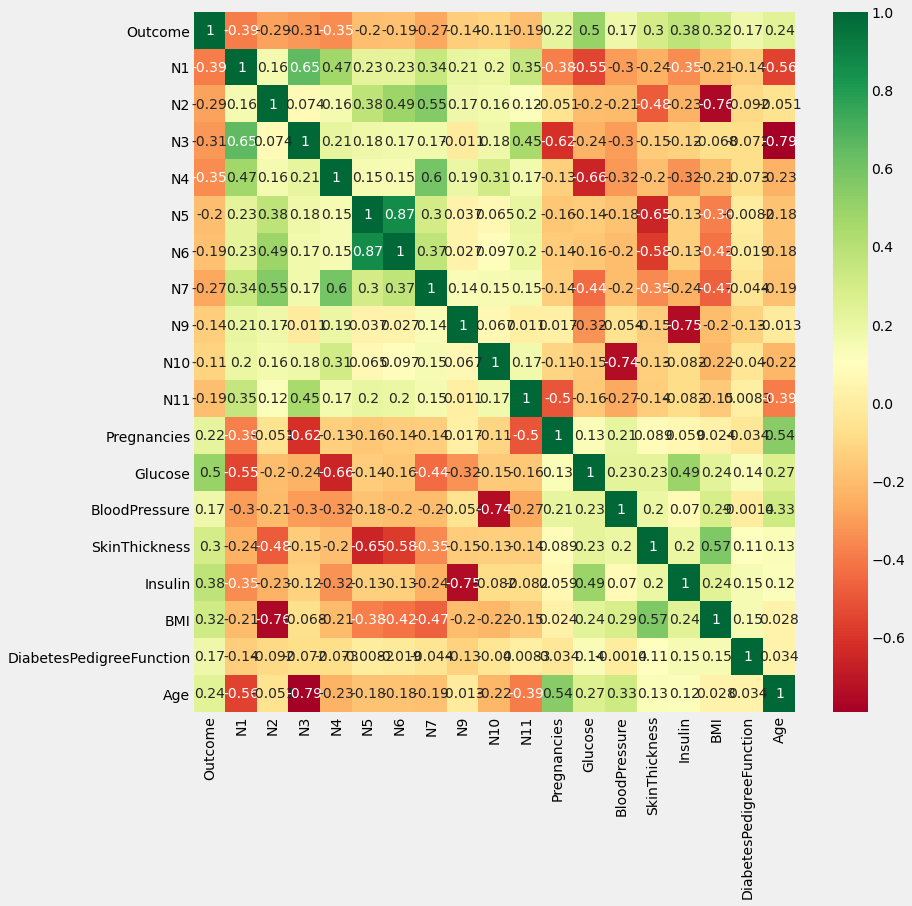

In [126]:
cor=dataset.corr()
plt.figure(figsize=(12,12))
sns.heatmap(cor,annot=True,cmap='RdYlGn')
plt.show()

In [129]:
def correlation_plot():
    #correlation
    correlation = dataset.corr()
    #tick labels
    matrix_cols = correlation.columns.tolist()
    #convert to array
    corr_array  = np.array(correlation)
    trace = go.Heatmap(z = corr_array,
                       x = matrix_cols,
                       y = matrix_cols,
                       colorscale='Viridis',
                       colorbar   = dict() ,
                      )
    layout = go.Layout(dict(title = 'Correlation Matrix for variables',
                            #autosize = False,
                            #height  = 1400,
                            #width   = 1600,
                            margin  = dict(r = 0 ,l = 100,
                                           t = 0,b = 100,
                                         ),
                            yaxis   = dict(tickfont = dict(size = 9)),
                            xaxis   = dict(tickfont = dict(size = 9)),
                           )
                      )
    fig = go.Figure(data = [trace],layout = layout)
    py.iplot(fig)


In [130]:
correlation_plot()

In [131]:
X = dataset.drop('Outcome', 1)
y = dataset['Outcome']

In [152]:
def model_performance(model, subtitle) :   
    #Kfold
    cv = KFold(n_splits=5,shuffle=False, random_state = 42)
    y_real = []
    y_proba = []
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0,1,100)
    i = 1
    
    for train,test in cv.split(X,y):
        model.fit(X.iloc[train], y.iloc[train])
        pred_proba = model.predict_proba(X.iloc[test])
        precision, recall, _ = precision_recall_curve(y.iloc[test], pred_proba[:,1])
        y_real.append(y.iloc[test])
        y_proba.append(pred_proba[:,1])
        fpr, tpr, t = roc_curve(y[test], pred_proba[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc) 
    
    # Confusion matrix
    y_pred = cross_val_predict(model, X, y, cv=5)
    conf_matrix = confusion_matrix(y, y_pred)
    trace1 = go.Heatmap(z = conf_matrix  ,x = ["0 (pred)","1 (pred)"],
                        y = ["0 (true)","1 (true)"],xgap = 2, ygap = 2, 
                        colorscale = 'Viridis', showscale  = False)
    
    #Show metrics
    tp = conf_matrix[1,1]
    fn = conf_matrix[1,0]
    fp = conf_matrix[0,1]
    tn = conf_matrix[0,0]
    Accuracy  =  ((tp+tn)/(tp+tn+fp+fn))
    Precision =  (tp/(tp+fp))
    Recall    =  (tp/(tp+fn))
    F1_score  =  (2*(((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn)))))

    show_metrics = pd.DataFrame(data=[[Accuracy , Precision, Recall, F1_score]])
    show_metrics = show_metrics.T

    colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue']
    trace2 = go.Bar(x = (show_metrics[0].values), 
                    y = ['Accuracy', 'Precision', 'Recall', 'F1_score'], text = np.round_(show_metrics[0].values,4),
                    textposition = 'auto', textfont=dict(color='black'),
                    orientation = 'h', opacity = 1, marker=dict(
            color=colors,
            line=dict(color='#9c9898',width=1.5)))

    #Roc curve
    mean_tpr = np.mean(tprs, axis=0)
    mean_auc = auc(mean_fpr, mean_tpr)

    trace3 = go.Scatter(x=mean_fpr, y=mean_tpr,
                        name = "Roc : " ,
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2), fill='tozeroy')
    trace4 = go.Scatter(x = [0,1],y = [0,1],
                        line = dict(color = ('black'),width = 1.5,
                        dash = 'dot'))
    
    #Precision - recall curve
    y_real = y
    y_proba = np.concatenate(y_proba)
    precision, recall, _ = precision_recall_curve(y_real, y_proba)

    trace5 = go.Scatter(x = recall, y = precision,
                        name = "Precision" + str(precision),
                        line = dict(color = ('lightcoral'),width = 2), fill='tozeroy')
    
    mean_auc=round(mean_auc,3)
    #Subplots
    fig = tls.make_subplots(rows=2, cols=2, print_grid=False,
                          specs=[[{}, {}], 
                                 [{}, {}]],
                          subplot_titles=('Confusion Matrix',
                                          'Metrics',
                                          'ROC curve'+" "+ '('+ str(mean_auc)+')',
                                          'Precision - Recall curve',
                                          ))
    #Trace and layout
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,1,2)
    fig.append_trace(trace3,2,1)
    fig.append_trace(trace4,2,1)
    fig.append_trace(trace5,2,2)
    
    fig['layout'].update(showlegend = False, title = '<b>Model performance report (5 folds)</b><br>'+subtitle,
                        autosize = False, height = 830, width = 830,
                        plot_bgcolor = 'black',
                        paper_bgcolor = 'black',
                        margin = dict(b = 195), font=dict(color='white'))
    fig["layout"]["xaxis1"].update(color = 'white')
    fig["layout"]["yaxis1"].update(color = 'white')
    fig["layout"]["xaxis2"].update((dict(range=[0, 1], color = 'white')))
    fig["layout"]["yaxis2"].update(color = 'white')
    fig["layout"]["xaxis3"].update(dict(title = "false positive rate"), color = 'white')
    fig["layout"]["yaxis3"].update(dict(title = "true positive rate"),color = 'white')
    fig["layout"]["xaxis4"].update(dict(title = "recall"), range = [0,1.05],color = 'white')
    fig["layout"]["yaxis4"].update(dict(title = "precision"), range = [0,1.05],color = 'white')
    for i in fig['layout']['annotations']:
        i['font'] = titlefont=dict(color='white', size = 14)
    py.iplot(fig)

In [153]:
from scipy import interp
import lightgbm as lgbm
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve,auc

In [154]:
random_state=42

fit_params = {"early_stopping_rounds" : 100, 
             "eval_metric" : 'auc', 
             "eval_set" : [(X,y)],
             'eval_names': ['valid'],
             'verbose': 0,
             'categorical_feature': 'auto'}

param_test = {'learning_rate' : [0.01, 0.02, 0.03, 0.04, 0.05, 0.08, 0.1, 0.2, 0.3, 0.4],
              'n_estimators' : [100, 200, 300, 400, 500, 600, 800, 1000, 1500, 2000],
              'num_leaves': sp_randint(6, 50), 
              'min_child_samples': sp_randint(100, 500), 
              'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
              'subsample': sp_uniform(loc=0.2, scale=0.8), 
              'max_depth': [-1, 1, 2, 3, 4, 5, 6, 7],
              'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
              'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
              'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

#number of combinations
n_iter = 300

#intialize lgbm and lunch the search
lgbm_clf = lgbm.LGBMClassifier(random_state=random_state, silent=True, metric='None', n_jobs=4)
grid_search = RandomizedSearchCV(
    estimator=lgbm_clf, param_distributions=param_test, 
    n_iter=n_iter,
    scoring='accuracy',
    cv=5,
    refit=True,
    random_state=random_state,
    verbose=True)

grid_search.fit(X, y, **fit_params)
opt_parameters =  grid_search.best_params_
lgbm_clf = lgbm.LGBMClassifier(**opt_parameters)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max

[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:  3.2min finished


LightGBM is a gradient boosting framework that uses tree based learning algorithms. It is designed to be distributed and efficient with the following advantages:

Faster training speed and higher efficiency.
Lower memory usage.
Better accuracy.
Support of parallel and GPU learning.
Capable of handling large-scale data.
To find the best hyperparameters, we'll use Random Search CV.

Random search is a technique where random combinations of the hyperparameters are used to find the best solution for the built model. Generally RS is more faster and accurate than GridSearchCV who calculate all possible combinations. With Random Grid we specify the number of combinations that we want

LightGBM : Hyperparameters :

learning_rate : This determines the impact of each tree on the final outcome. GBM works by starting with an initial estimate which is updated using the output of each tree. The learning parameter controls the magnitude of this change in the estimates
n_estimators : number of trees (or rounds)
num_leaves : number of leaves in full tree, default: 31
min_child_samples : minimal number of data in one leaf. Can be used to deal with over-fitting
min_child_weight : minimal sum hessian in one leaf.
subsample : randomly select part of data without resampling
max_depth : It describes the maximum depth of tree. This parameter is used to handle model overfitting.
colsample_bytree : LightGBM will randomly select part of features on each iteration if colsample_bytree smaller than 1.0. For example, if you set it to 0.8, LightGBM will select 80% of features before training each tree
reg_alpha : regularization
reg_lambda : regularization

early_stopping_rounds : This parameter can help you speed up your analysis. Model will stop training if one metric of one validation data doesn’t improve in last early_stopping_round rounds. This will reduce excessive iterations

In [155]:
model_performance(lgbm_clf, 'LightGBM')


c:\users\admin\env2\lib\site-packages\plotly\tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [158]:
plot_feat1_feat2('Pregnancies','SkinThickness')

In [160]:
dataset.loc[:,'N19']=0
dataset.loc[(dataset['Pregnancies']<=4) & (dataset['SkinThickness']<=20),'N19']=1

In [169]:
barplot('N19', ': Pregnancies <= 4 and SkinThickness <= 20')

In [215]:
types=['rbf','linear']
for i in types:
    model=svm.SVC(kernel=i)
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    print('Accuracy for SVM kernel=',i,'is',metrics.accuracy_score(prediction,test_Y))
    print(metrics.classification_report(test_Y,prediction))
    SVMscore = model.score(test_X,test_Y)

Accuracy for SVM kernel= rbf is 0.765625
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       125
           1       0.74      0.51      0.60        67

    accuracy                           0.77       192
   macro avg       0.76      0.71      0.72       192
weighted avg       0.76      0.77      0.75       192

Accuracy for SVM kernel= linear is 0.7708333333333334
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       125
           1       0.71      0.58      0.64        67

    accuracy                           0.77       192
   macro avg       0.75      0.73      0.74       192
weighted avg       0.77      0.77      0.76       192



In [230]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_Y))
print(metrics.classification_report(test_Y,prediction))
LRscore = model.score(test_X,test_Y)

The accuracy of the Logistic Regression is 0.78125
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       125
           1       0.73      0.60      0.66        67

    accuracy                           0.78       192
   macro avg       0.77      0.74      0.75       192
weighted avg       0.78      0.78      0.78       192



In [216]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,test_Y))
print(metrics.classification_report(test_Y,prediction))
DTCscore = model.score(test_X,test_Y)

The accuracy of the Decision Tree is 0.765625
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       125
           1       0.67      0.64      0.66        67

    accuracy                           0.77       192
   macro avg       0.74      0.74      0.74       192
weighted avg       0.76      0.77      0.76       192



              precision    recall  f1-score   support

           0       0.77      0.87      0.82       125
           1       0.69      0.52      0.59        67

    accuracy                           0.75       192
   macro avg       0.73      0.70      0.71       192
weighted avg       0.74      0.75      0.74       192



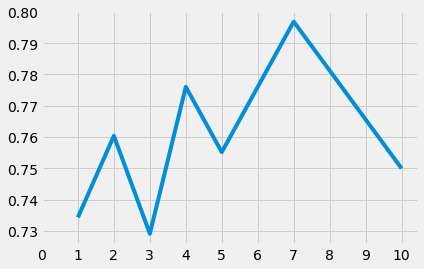

In [228]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
#plt.show()
#print('Accuracies for different values of n are:',a.values)
print(metrics.classification_report(test_Y,prediction))
KNNscore = model.score(test_X,test_Y)

In [237]:
abc=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier()]
for i in models:
    model = i
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    print(i)
    abc.append(metrics.accuracy_score(prediction,test_Y))
    #abc.append(metrics.classification_report(test_Y,prediction))
    print(metrics.classification_report(test_Y,prediction))
models_dataframe=pd.DataFrame(abc, index= classifiers)   
models_dataframe.columns=['Accuracy']
models_dataframe


SVC(kernel='linear')
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       125
           1       0.71      0.58      0.64        67

    accuracy                           0.77       192
   macro avg       0.75      0.73      0.74       192
weighted avg       0.77      0.77      0.76       192

SVC()
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       125
           1       0.74      0.51      0.60        67

    accuracy                           0.77       192
   macro avg       0.76      0.71      0.72       192
weighted avg       0.76      0.77      0.75       192

LogisticRegression()
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       125
           1       0.73      0.60      0.66        67

    accuracy                           0.78       192
   macro avg       0.77      0.74      0.75       192
weighted avg       0.78   

,Accuracy
Linear Svm,0.770833
Radial Svm,0.765625
Logistic Regression,0.781250
KNN,0.729167
Decision Tree,0.760417


In [233]:
scores=[LRscore,DTCscore,KNNscore,SVMscore]
AlgorthmsName=["Logistic Regression","Decision Tree","KNN", "LSVM"]

#create traces

trace1 = go.Scatter(
    x = AlgorthmsName,
    y= scores,
    name='Algortms Name',
    marker =dict(color='rgba(0,255,0,0.5)',
               line =dict(color='rgb(0,0,0)',width=2)),
                text=AlgorthmsName
)
data = [trace1]

layout = go.Layout(barmode = "group",
                  xaxis= dict(title= 'ML Algorithms',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Prediction Scores',ticklen= 5,zeroline= False))
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [246]:
from pycaret.classification import*

In [247]:
classification_setup= setup(data=dataset, target ='Outcome', remove_outliers= True, normalize=True, silent =True, session_id=6655)


Setup Succesfully Completed!


,Description,Value
0,session_id,6655
1,Target Type,Binary
2,Label Encoded,"0: 0, 1: 1"
3,Original Data,"(768, 20)"
4,Missing Values,False
5,Numeric Features,8
6,Categorical Features,11
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [250]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Light Gradient Boosting Machine,0.8706,0.9356,0.8143,0.8230,0.8163,0.7166,0.7190,0.1329
1,CatBoost Classifier,0.8686,0.9310,0.7977,0.8290,0.8110,0.7106,0.7128,5.9059
2,Extreme Gradient Boosting,0.8667,0.9317,0.7971,0.8273,0.8064,0.7053,0.7110,0.0979
3,Ada Boost Classifier,0.8588,0.9092,0.8079,0.8013,0.7977,0.6902,0.6963,0.1472
4,Gradient Boosting Classifier,0.8588,0.9329,0.7760,0.8202,0.7955,0.6880,0.6906,0.2407
5,Decision Tree Classifier,0.8373,0.8209,0.7643,0.7762,0.7674,0.6424,0.6452,0.0077
6,Random Forest Classifier,0.8294,0.9040,0.6836,0.8190,0.7405,0.6157,0.6245,0.0348
7,Extra Trees Classifier,0.8294,0.8994,0.7216,0.7865,0.7476,0.6202,0.6249,0.2312
8,Logistic Regression,0.8176,0.8915,0.6942,0.7773,0.7271,0.5921,0.5991,0.0393
9,Ridge Classifier,0.8137,0.0000,0.6667,0.7891,0.7169,0.5805,0.5892,0.0070


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=6655, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [280]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier


for i in range(1,9):
    rfe = RFE(estimator=RandomForestClassifier(),n_features_to_select=i, verbose=0)
    rfe.fit(train_X,train_Y)
    print(f"Accuracy with Feature {i} ==>",metrics.accuracy_score(test_Y, rfe.predict(test_X)))

Accuracy with Feature 1 ==> 0.7135416666666666
Accuracy with Feature 2 ==> 0.7395833333333334
Accuracy with Feature 3 ==> 0.7552083333333334
Accuracy with Feature 4 ==> 0.765625
Accuracy with Feature 5 ==> 0.7864583333333334
Accuracy with Feature 6 ==> 0.7864583333333334
Accuracy with Feature 7 ==> 0.796875
Accuracy with Feature 8 ==> 0.7760416666666666


In [287]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier


for i in range(1,9):
    rfe = RFE(estimator=RandomForestClassifier(),n_features_to_select=i, verbose=0)
    rfe.fit(train_X,train_Y)
    print(f"Accuracy with Feature {i} ==>",metrics.accuracy_score(test_Y, rfe.predict(test_X)))
    print(metrics.confusion_matrix(test_Y, rfe.predict(test_X)))


Accuracy with Feature 1 ==> 0.7083333333333334
[[103  22]
 [ 34  33]]
Accuracy with Feature 2 ==> 0.7760416666666666
[[106  19]
 [ 24  43]]
Accuracy with Feature 3 ==> 0.7760416666666666
[[110  15]
 [ 28  39]]
Accuracy with Feature 4 ==> 0.78125
[[108  17]
 [ 25  42]]
Accuracy with Feature 5 ==> 0.7760416666666666
[[108  17]
 [ 26  41]]
Accuracy with Feature 6 ==> 0.7864583333333334
[[112  13]
 [ 28  39]]
Accuracy with Feature 7 ==> 0.7916666666666666
[[112  13]
 [ 27  40]]
Accuracy with Feature 8 ==> 0.7916666666666666
[[111  14]
 [ 26  41]]


In [267]:
dt1=create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7843,0.7640,0.6842,0.7222,0.7027,0.5337,0.5341
1,0.8824,0.8849,0.8947,0.8095,0.8500,0.7536,0.7562
2,0.8431,0.8429,0.8421,0.7619,0.8000,0.6715,0.6738
3,0.8235,0.8005,0.7222,0.7647,0.7429,0.6087,0.6093
4,0.8627,0.8434,0.7778,0.8235,0.8000,0.6957,0.6963
5,0.8431,0.8030,0.6667,0.8571,0.7500,0.6383,0.6490
6,0.7451,0.7020,0.5556,0.6667,0.6061,0.4199,0.4238
7,0.9216,0.9268,0.9444,0.8500,0.8947,0.8325,0.8354
8,0.8824,0.8838,0.8889,0.8000,0.8421,0.7488,0.7514
9,0.7843,0.7576,0.6667,0.7059,0.6857,0.5217,0.5222


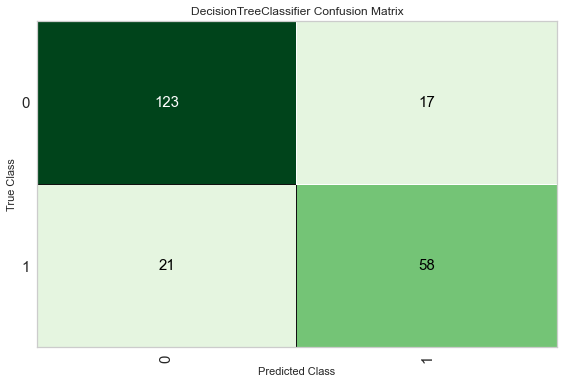

In [268]:
plot_model(estimator=dt1, plot = 'confusion_matrix')

In [269]:
dt2=create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8235,0.9153,0.6316,0.8571,0.7273,0.6012,0.6165
1,0.7843,0.8462,0.6316,0.7500,0.6857,0.5234,0.5278
2,0.7843,0.8816,0.6842,0.7222,0.7027,0.5337,0.5341
3,0.8039,0.8838,0.7222,0.7222,0.7222,0.5707,0.5707
4,0.9020,0.9158,0.7222,1.0000,0.8387,0.7709,0.7920
5,0.8627,0.9402,0.7222,0.8667,0.7879,0.6877,0.6939
6,0.7647,0.8131,0.4444,0.8000,0.5714,0.4270,0.4620
7,0.8824,0.9739,0.7778,0.8750,0.8235,0.7358,0.7386
8,0.8824,0.9461,0.7778,0.8750,0.8235,0.7358,0.7386
9,0.8039,0.9234,0.7222,0.7222,0.7222,0.5707,0.5707


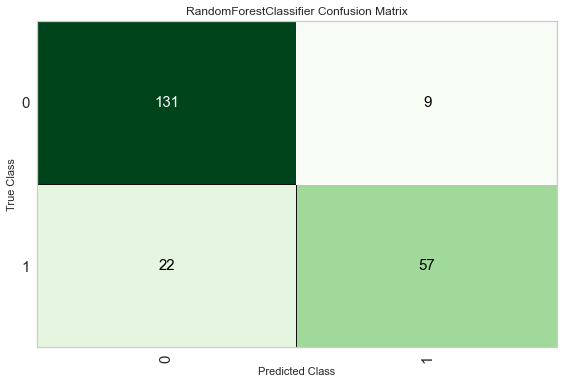

In [270]:
plot_model(estimator=dt2, plot = 'confusion_matrix')

In [271]:
dt3=create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8235,0.9030,0.6842,0.8125,0.7429,0.6100,0.6152
1,0.7843,0.8931,0.5789,0.7857,0.6667,0.5126,0.5257
2,0.8235,0.8849,0.7895,0.7500,0.7692,0.6265,0.6271
3,0.7843,0.8333,0.7778,0.6667,0.7179,0.5450,0.5493
4,0.8824,0.9293,0.8889,0.8000,0.8421,0.7488,0.7514
5,0.8039,0.9125,0.6111,0.7857,0.6875,0.5479,0.5571
6,0.7451,0.7946,0.4444,0.7273,0.5517,0.3878,0.4108
7,0.9020,0.9714,0.8333,0.8824,0.8571,0.7826,0.7833
8,0.7843,0.8788,0.6667,0.7059,0.6857,0.5217,0.5222
9,0.8431,0.9141,0.6667,0.8571,0.7500,0.6383,0.6490


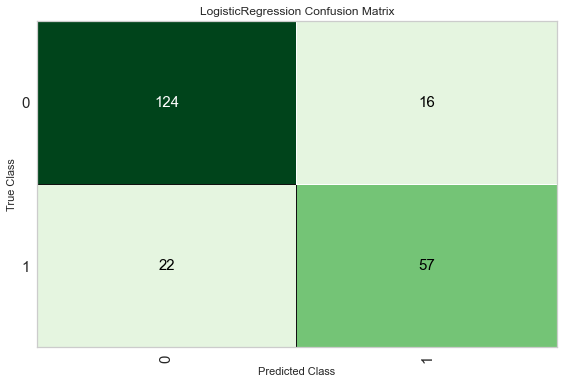

In [272]:
plot_model(estimator=dt3, plot = 'confusion_matrix')

In [277]:
TP =57                           #confusion_matrix[1, 1]
TN = 124                         #confusion_matrix[0, 0]
FP = 16                            #confusion_matrix[0, 1]
FN = 22                           #confusion_matrix[1, 0]
# Log REg
print("Sensitivity: %.4f" % (TP / float(TP + FN)))
print("Specificy  : %.4f" % (TN / float(TN + FP)))

Sensitivity: 0.7215
Specificy  : 0.8857


In [278]:
TP =57                          #confusion_matrix[1, 1]
TN = 131                         #confusion_matrix[0, 0]
FP = 9                           #confusion_matrix[0, 1]
FN = 22                           #confusion_matrix[1, 0]
# RF
print("Sensitivity: %.4f" % (TP / float(TP + FN)))
print("Specificy  : %.4f" % (TN / float(TN + FP)))

Sensitivity: 0.7215
Specificy  : 0.9357


In [279]:
TP =58                          #confusion_matrix[1, 1]
TN = 123                         #confusion_matrix[0, 0]
FP = 17                           #confusion_matrix[0, 1]
FN = 21                           #confusion_matrix[1, 0]
# DT
print("Sensitivity: %.4f" % (TP / float(TP + FN)))
print("Specificy  : %.4f" % (TN / float(TN + FP)))

Sensitivity: 0.7342
Specificy  : 0.8786


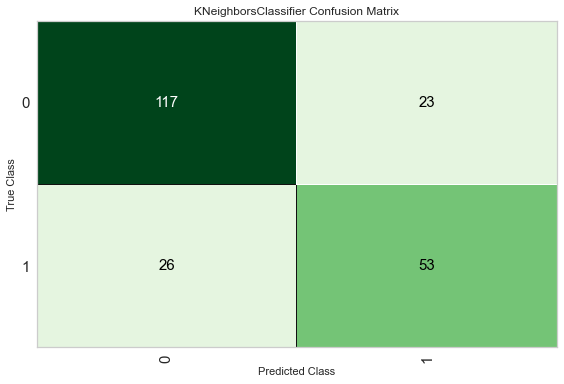

In [288]:
dt4=create_model('knn')
plot_model(estimator=dt4, plot = 'confusion_matrix')

In [289]:
TP =53                          #confusion_matrix[1, 1]
TN = 117                         #confusion_matrix[0, 0]
FP = 23                           #confusion_matrix[0, 1]
FN = 26                           #confusion_matrix[1, 0]
# KNN
print("Sensitivity: %.4f" % (TP / float(TP + FN)))
print("Specificy  : %.4f" % (TN / float(TN + FP)))

Sensitivity: 0.6709
Specificy  : 0.8357


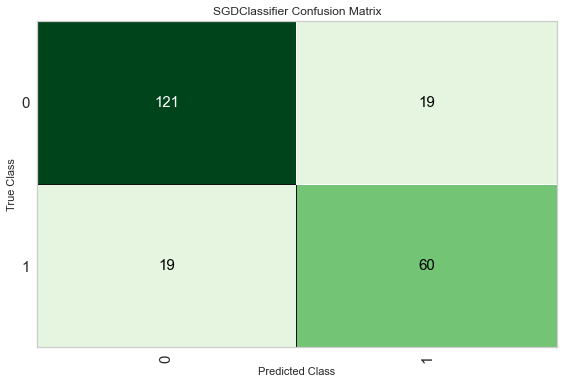

In [290]:
dt5=create_model('svm')
plot_model(estimator=dt5, plot = 'confusion_matrix')

In [291]:
TP =60                          #confusion_matrix[1, 1]
TN = 121                         #confusion_matrix[0, 0]
FP = 19                          #confusion_matrix[0, 1]
FN = 19                           #confusion_matrix[1, 0]
# SVM
print("Sensitivity: %.4f" % (TP / float(TP + FN)))
print("Specificy  : %.4f" % (TN / float(TN + FP)))

Sensitivity: 0.7595
Specificy  : 0.8643


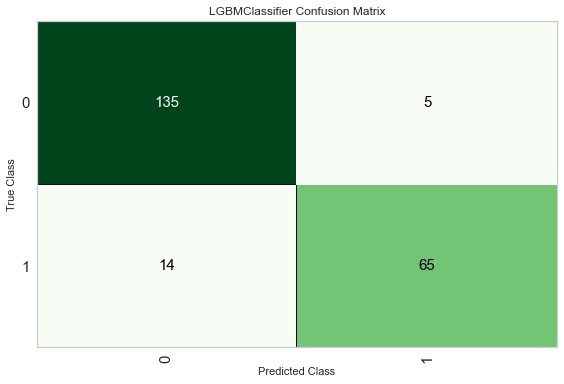

In [292]:
dt6=create_model('lightgbm')
plot_model(estimator=dt6, plot = 'confusion_matrix')

In [293]:
TP =65                          #confusion_matrix[1, 1]
TN = 135                         #confusion_matrix[0, 0]
FP = 5                          #confusion_matrix[0, 1]
FN = 14                           #confusion_matrix[1, 0]
# lightgbm
print("Sensitivity: %.4f" % (TP / float(TP + FN)))
print("Specificy  : %.4f" % (TN / float(TN + FP)))

Sensitivity: 0.8228
Specificy  : 0.9643


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier


for i in range(1,9):
    rfe = RFE(estimator=RandomForestClassifier(),n_features_to_select=i, verbose=0)
    rfe.fit(train_X,train_Y)
    print(f"Accuracy with Feature {i} ==>",metrics.accuracy_score(test_Y, rfe.predict(test_X)))
    print(metrics.confusion_matrix(test_Y, rfe.predict(test_X)))

In [319]:
from sklearn.feature_selection import RFE

for i in range(1,9):
    model1 = RFE(estimator=DecisionTreeClassifier(),n_features_to_select=i, verbose=0)
    #model1 = LogisticRegression()
    model1.fit(train_X,train_Y)
    prediction1=model.predict(test_X)
    print(f"Accuracy with Feature {i} ==>",metrics.accuracy_score(test_Y, model1.predict(test_X)))
    print(metrics.confusion_matrix(test_Y, model1.predict(test_X)))
    



Accuracy with Feature 1 ==> 0.703125
[[104  21]
 [ 36  31]]
Accuracy with Feature 2 ==> 0.765625
[[103  22]
 [ 23  44]]
Accuracy with Feature 3 ==> 0.6927083333333334
[[98 27]
 [32 35]]
Accuracy with Feature 4 ==> 0.734375
[[101  24]
 [ 27  40]]
Accuracy with Feature 5 ==> 0.7552083333333334
[[102  23]
 [ 24  43]]
Accuracy with Feature 6 ==> 0.78125
[[104  21]
 [ 21  46]]
Accuracy with Feature 7 ==> 0.765625
[[101  24]
 [ 21  46]]
Accuracy with Feature 8 ==> 0.78125
[[104  21]
 [ 21  46]]


In [320]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

for i in range(1,9):
    model2 = RFE(estimator=SVC(kernel="linear"),n_features_to_select=i, verbose=0)
    model2.fit(train_X,train_Y)
    #prediction2=model2.predict(test_X)
    print(f"Accuracy with Feature {i} ==>",metrics.accuracy_score(test_Y, model2.predict(test_X)))
    print(metrics.confusion_matrix(test_Y, model2.predict(test_X)))

Accuracy with Feature 1 ==> 0.6510416666666666
[[125   0]
 [ 67   0]]
Accuracy with Feature 2 ==> 0.6510416666666666
[[125   0]
 [ 67   0]]
Accuracy with Feature 3 ==> 0.7083333333333334
[[117   8]
 [ 48  19]]
Accuracy with Feature 4 ==> 0.7604166666666666
[[110  15]
 [ 31  36]]
Accuracy with Feature 5 ==> 0.7760416666666666
[[112  13]
 [ 30  37]]
Accuracy with Feature 6 ==> 0.7708333333333334
[[110  15]
 [ 29  38]]
Accuracy with Feature 7 ==> 0.78125
[[111  14]
 [ 28  39]]
Accuracy with Feature 8 ==> 0.7708333333333334
[[109  16]
 [ 28  39]]


In [323]:
from sklearn.feature_selection import RFE


for i in range(1,9):
    model3 = RFE(estimator= lgbm.LGBMClassifier(),n_features_to_select=i, verbose=0)
    model3.fit(train_X,train_Y)
    #prediction2=model2.predict(test_X)
    print(f"Accuracy with Feature {i} ==>",metrics.accuracy_score(test_Y, model3.predict(test_X)))
    print(metrics.confusion_matrix(test_Y, model3.predict(test_X)))

Accuracy with Feature 1 ==> 0.578125
[[96 29]
 [52 15]]
Accuracy with Feature 2 ==> 0.640625
[[101  24]
 [ 45  22]]
Accuracy with Feature 3 ==> 0.765625
[[105  20]
 [ 25  42]]
Accuracy with Feature 4 ==> 0.75
[[106  19]
 [ 29  38]]
Accuracy with Feature 5 ==> 0.7604166666666666
[[104  21]
 [ 25  42]]
Accuracy with Feature 6 ==> 0.7760416666666666
[[105  20]
 [ 23  44]]
Accuracy with Feature 7 ==> 0.7708333333333334
[[105  20]
 [ 24  43]]
Accuracy with Feature 8 ==> 0.78125
[[109  16]
 [ 26  41]]


In [419]:
test_X['output'] =prediction
print(test_X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
147            2      106             64             35      119  30.5   
565            2       95             54             14       88  26.1   
390            1      100             66             29      196  32.0   
736            0      126             86             27      120  27.4   
587            6      103             66              0        0  24.3   
..           ...      ...            ...            ...      ...   ...   
339            7      178             84              0        0  39.9   
140            3      128             78              0        0  21.1   
463            5       88             78             30        0  27.6   
525            3       87             60             18        0  21.8   
56             7      187             68             39      304  37.7   

     DiabetesPedigreeFunction  Age  output  
147                     1.400   34       1  
565                  

In [420]:
test_X.to_csv('new_dataset.csv', index=False)

In [431]:
from sklearn import *